<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/Algoritma_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd # UNTUK MEMANIPULASI DATA (MEMBACA DATA CSV)
import numpy as np # UNTUK MANUPULASI DATA (MENGUBAH LIST MENJADI ARRAY)

from sklearn.model_selection import train_test_split # UNTUK MEMISAHKAN ANTARA DATA TEST DAN DATA TRAINING
from sklearn.metrics import classification_report # UNTUK MELAKUKAN EVALUASI MODEL MATRIKS
from sklearn import tree # UNTUK MODEL DECISION TREE

import plotly.express as px  # UNTUK VISUALISASI DATA
import plotly.graph_objects as go # UNTUK VISUALISASI DATA
import graphviz # UNTUK PLOT DESICION TREE

In [ ]:
#IMPORT DATASET DAN MENAMPILKAN DATASET
dataset = pd.read_csv('weatherAUS.csv')
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
# MENGHAPUS NILAI KOSONG PADA VARIABEL DEPENDEN
dataset=dataset[pd.isnull(dataset['RainTomorrow'])==False]

# MEMBERIKAN ISI PADA NILAI YANG KOSONG DENGAN NILAI RATA-RATA KOLOM
dataset=dataset.fillna(dataset.mean())

# MELAKUKAN KONVERSI DATA YANG BERNILAI HURUF MENJADI DATA YANG BERNILAI ANGKA
dataset['RainTodayFlag']=dataset['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
dataset['RainTomorrowFlag']=dataset['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

# MENAMPILKAN DATA YANG SUDAH DIBERSIHKAN
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTodayFlag,RainTomorrowFlag
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No,0,0


In [ ]:
#CEK NILAI NULL DAN OUTLIER DATA
print(dataset.info())

print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  object 
 2   MinTemp           142193 non-null  float64
 3   MaxTemp           142193 non-null  float64
 4   Rainfall          142193 non-null  float64
 5   Evaporation       142193 non-null  float64
 6   Sunshine          142193 non-null  float64
 7   WindGustDir       132863 non-null  object 
 8   WindGustSpeed     142193 non-null  float64
 9   WindDir9am        132180 non-null  object 
 10  WindDir3pm        138415 non-null  object 
 11  WindSpeed9am      142193 non-null  float64
 12  WindSpeed3pm      142193 non-null  float64
 13  Humidity9am       142193 non-null  float64
 14  Humidity3pm       142193 non-null  float64
 15  Pressure9am       142193 non-null  float64
 16  Pressure3pm       14

In [ ]:
# MENAMPILKAN JUMLAH BARIS DAN KOLOM DATASET
dataset.shape

(142193, 25)

In [ ]:
#MENENTUKAN VARIABEL DEPENDEN DAN INDEPENDEN
feature=['WindGustSpeed', 'Humidity3pm'] # NAMA KOLOM VARIABEL INDEPENDEN
x_set_values = dataset[feature] #DATA VARIABEL INDEPENDEN
y_set_values = dataset['RainTomorrowFlag'].values # NILAI VARIABEL DEPENDEN

In [ ]:
#MENAMPILKAN NILAI VARIABEL INDEPENDEN
x_set_values

,WindGustSpeed,Humidity3pm
0,44.0,22.0
1,44.0,25.0
2,46.0,30.0
3,24.0,16.0
4,41.0,33.0
...,...,...
145454,31.0,27.0
145455,31.0,24.0
145456,22.0,21.0
145457,37.0,24.0


In [ ]:
#MENAMPILKAN NILAI VARIABEL DEPENDEN
y_set_values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# FUNGSI MENJALANKAN ALGORITMA
def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # MEMBAGI DATASET MENJADI DATA TES DAN DATA TRAINING DENGAN PERBANDINGAN 20%:80%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # MEMBUAT OBJEK DESICION TREE CLASSIFIER
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=0, 
                                  )
    # MELAKUKAN TRAINING DATA DENGAN MENGGUNAKAN MODEL DESICION TREE CLASSIFIER
    clf = model.fit(X_train, y_train)

    # MELAKUKAN PREDIKSI PADA DATA TRAINING
    pred_labels_tr = model.predict(X_train)
    # MELAKUKAN PREDIKSI PADA DATA TEST
    pred_labels_te = model.predict(X_test)

    # MENAMPILKAN RINGKASAN DARI ALGORITMA DAN HASIL EVALUASI MODEL
    print('*************** Tree Summary ***************')
    print('Kelas: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('Number of leaves: ', clf.tree_.n_leaves)
    print('Number of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    # MENAMPILKAN SKOR DATA TES
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # MENAMPILKAN LAPORAN KLASIFIKASI UNTUK EVALUASI MODEL
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    # MENAMPILKAN SKOR DATA TRAINING
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # MENAMPILKAN LAPORAN KLASIFIKASI UNTUK EVALUASI MODEL
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # MEMNGGUNKAN FUNGSI GRAPHVIZ UNTUK MELAKUKAN PLOT
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True,
                                rotate=True
                               ) 
    graph = graphviz.Source(dot_data)
    
    # MENGEMBALIKAN NILAI DATA YANG RELEVAN UNTUK NEMPILKAN DIAGRAM PLOT
    return X_train, X_test, y_train, y_test, clf, graph

*************** Tree Summary ***************
Kelas:  [0 1]
Tree Depth:  10
Number of leaves:  82
Number of features:  2
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8335032877386688
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22067
           1       0.73      0.40      0.52      6372

    accuracy                           0.83     28439
   macro avg       0.79      0.68      0.71     28439
weighted avg       0.82      0.83      0.81     28439

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8316982259964485
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     88249
           1       0.73      0.40      0.52     25505

    accuracy                           0.83    113754
   macro avg       0.79      0.

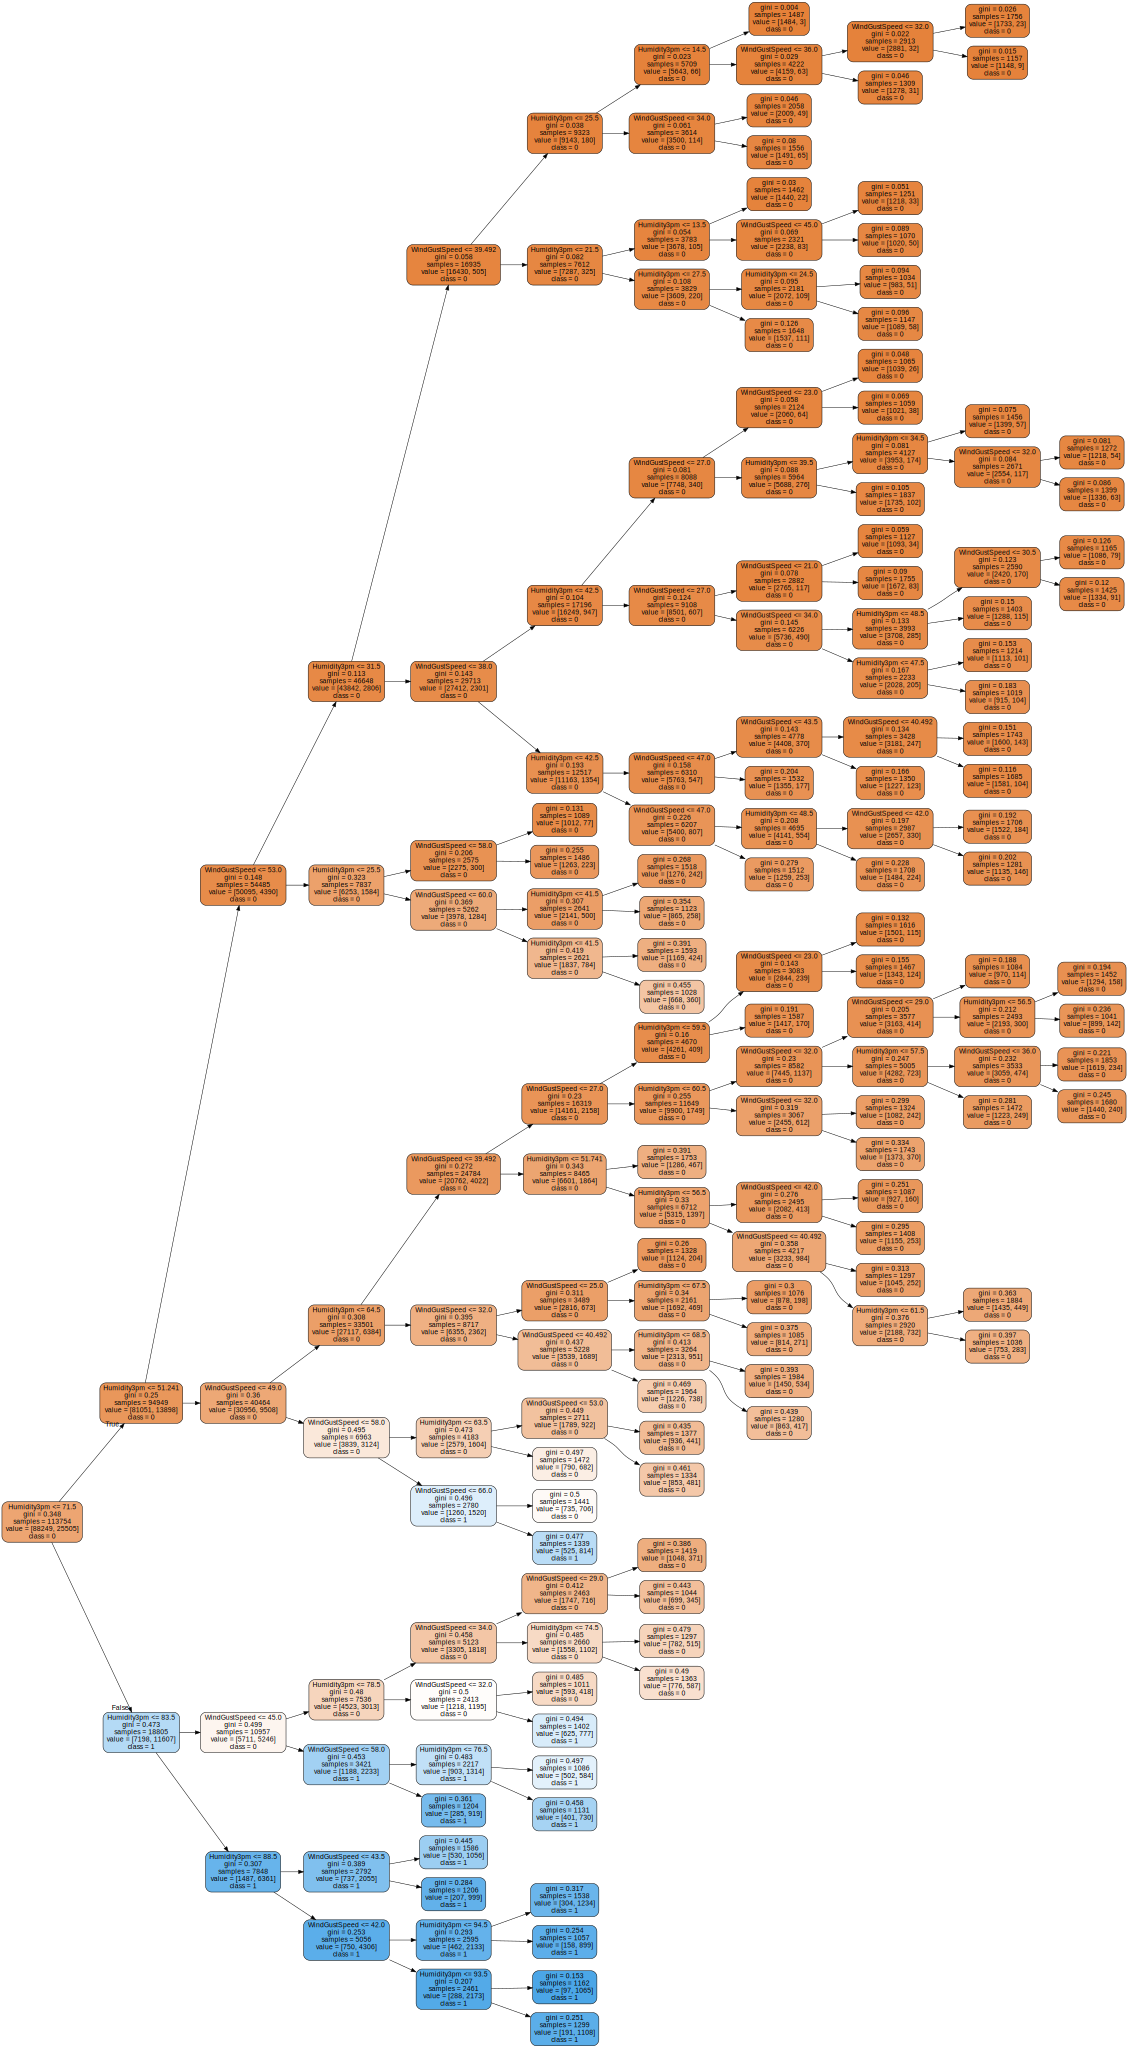

In [456]:
# MENJALANKAN FUNGSI FITTING
# PARAMETER 1 YAITU DATA VARIABEL INDEPENDEN
# PARAMETER 2 YAITU DATA VARIABEL DEPENDEN
# PARAMETER 3 YAITU KRITERION DATA (GINI)
# PARAMETER 4 YAITU SPLITTER 
# PARAMETER 5 YAITU MAX DEPTH
# PARAMETER 6 YAITU CLWEIGHT
# PARAMATER 7 YAITU MIN LEAF
X_train, X_test, y_train, y_test, clf, graph = fitting(x_set_values, y_set_values, 'gini', 'best', 
                                                       mdepth=None, 
                                                       clweight=None, 
                                                       minleaf=1000)

#MENAMPILKAN HASIL VISUALISASI
graph